In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima


     |████████████████████████████████| 1.4 MB 7.8 MB/s 
     |████████████████████████████████| 9.8 MB 44.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
Electrical_prod = pd.read_csv('/content/Electric_Production.csv')


In [ ]:
Electrical_prod.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
Electrical_prod['DATE']=pd.to_datetime(Electrical_prod['DATE'])



In [ ]:
Electrical_prod.set_index('DATE',inplace=True)


In [ ]:
Electrical_prod.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


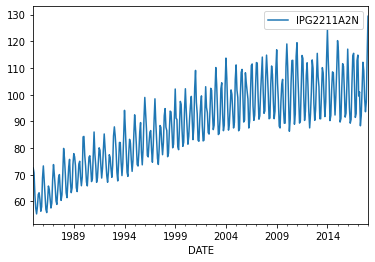

In [ ]:
Electrical_prod.plot()

In [ ]:
#stationarity test
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(Electrical_prod)


(0.01, False)

In [ ]:
#Spliting the dataset into train and test
train = Electrical_prod[:85]
test = Electrical_prod[-20:]


In [ ]:
train.tail()


,IPG2211A2N
DATE,
1991-09-01,73.5743
1991-10-01,68.7538
1991-11-01,72.5166
1991-12-01,79.4894
1992-01-01,85.2855


In [ ]:
test.head()


,IPG2211A2N
DATE,
2016-06-01,104.0375
2016-07-01,114.5397
2016-08-01,115.5159
2016-09-01,102.7637
2016-10-01,91.4867


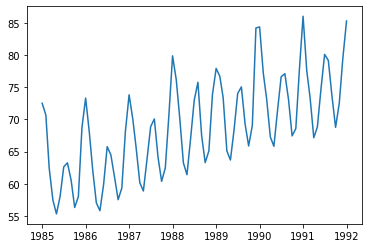

In [ ]:
plt.plot(train)


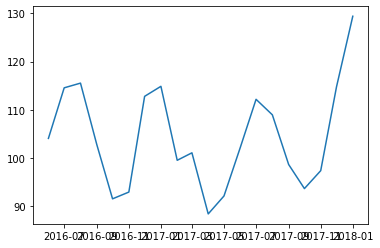

In [ ]:
plt.plot(test)

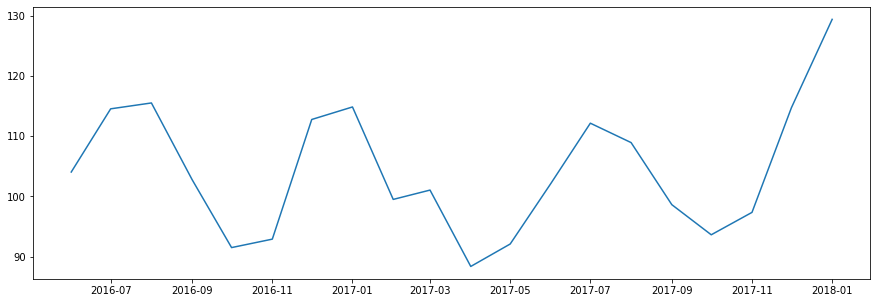

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test)


In [ ]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=326.309, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=321.797, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=305.333, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=321.934, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=2.56 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=315.807, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.75 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=312.933, Time=0.47 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=300.186, Time=1.46 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.37 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=2.56 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=2.52 sec

In [ ]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   85
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -145.997
Date:                              Thu, 30 Dec 2021   AIC                            299.994
Time:                                      19:41:45   BIC                            309.101
Sample:                                           0   HQIC                           303.620
                                               - 85                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4787      0.119     -4.006      0.000      -0.713      -0.244
ma.L2         -0.3069      0.106     -2.892      0.004      -0.515      -0.099
ma.S.L12      -0.7919      0.204     -3.891      0.000      -1.191      -0.393
sigma2         2.8438      0.490      5.800      0.000       1.883       3.805
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                17.34
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             0.49
Prob(H) (two-sided):                  0.32   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['Ecectrical_Production_prediction']
prediction


,Ecectrical_Production_prediction
DATE,
2016-06-01,81.411682
2016-07-01,76.788794
2016-08-01,70.518491
2016-09-01,69.703943
2016-10-01,74.810563
2016-11-01,80.130923
2016-12-01,80.586371
2017-01-01,75.369982
2017-02-01,70.998206


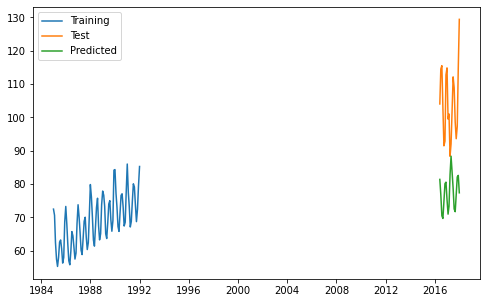

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()
